<a href="https://colab.research.google.com/github/thual/HSL-obstacle/blob/main/Systeme_Dynamique_obstacle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 11/12/2022. Licence CC BY-SA*

# Système dynamique pour le franchissement d'un obstacle


La profondeur $h={\cal H}(x)$ d'un écoulement stationnaire à surface libre dans un canal obéit à l'équation 
$$ {dh\over dx} = {I(x)- J(h)\over 1- Fr^2(h)}\;,$$
où $I(x)$ est la pente du fond, $J(h)=(q/K)^2 h^{-10/3}$ est le frottement, $Fr^2(h) = (h/ h_c)^{-3}$ est le carré du nombre de Froude, $q$ est le débit linéique,  $K$ est le nombre de Strickler,  $g=9,81$ m.s $^{-2}$ la gravité et $h_c$ la hauteur critique définie par $h_c =(q^2/ g)^{1/3}$.


 On suppose ici que le cote du fond est un obstacle gaussien exprimé sous la forme 
$$ Z_f(x) = a \exp\left( - {x^2 \over 2\, \sigma^2}\right)\;,$$
la pente étant définie par $I(x) = -Z_f'(x)$. 
On pourra utiliser les valeurs numériques $h_c = 5$ cm, $a=3$ cm et $\sigma = 20$ cm. 

On souhaite calculer la famille des lignes d'eau $h(x)$ capables de franchir cet obstacle gaussien. Pour ce faire, on intègre le système dynamique suivant:
$$
\left\{\begin{matrix}
 {dx \over ds} &=& 1- Fr^2(h) \,,\cr
  {dh \over ds} &=& I(x)- J(h) \,,\cr
 \end{matrix}
 \right.
 $$
où $s$ est un parmétrage des courbes de remous $h={\cal H}(x)$ décrites par les cordonées $[x(s),h(s)]$. 




 Deux méthodes sont explorées :
* Méthode 1 : intégration du système dynamique à partir de conditions initiales $[x(0), h(0)]$ choisie en amont et en aval de l'obstacle
* Méthode 2 : intégration du système dynamique à partir de conditions initiales $[x(0), h(0)]$ choisie dans le voisinage du point critique $(x_c, h_c)$ tel que $Fr^2(h_c)=1$ et $I(x_c)= J(h_c)$. 



**Références :**
* O. Thual, [Hydrodynamique à surface libre](https://www.olivier-thual.fr/xsee/index.htm),  Les Éditions de l'École Polytechnique, 2010.

*  O. Thual, [Hydraulique à surface libre](https://www.olivier-thual.fr/200122), Éd. Ress. Pédago. Ouv. INP 0122 (2020) 40h


**TP numérique :**

Ce TP numérique consiste à faire varier des paramètres à partir du code python de démonstration proposé. Ce Jupyter notebook pourra être recopié pour en créer un nouveau avec ces modifications. 


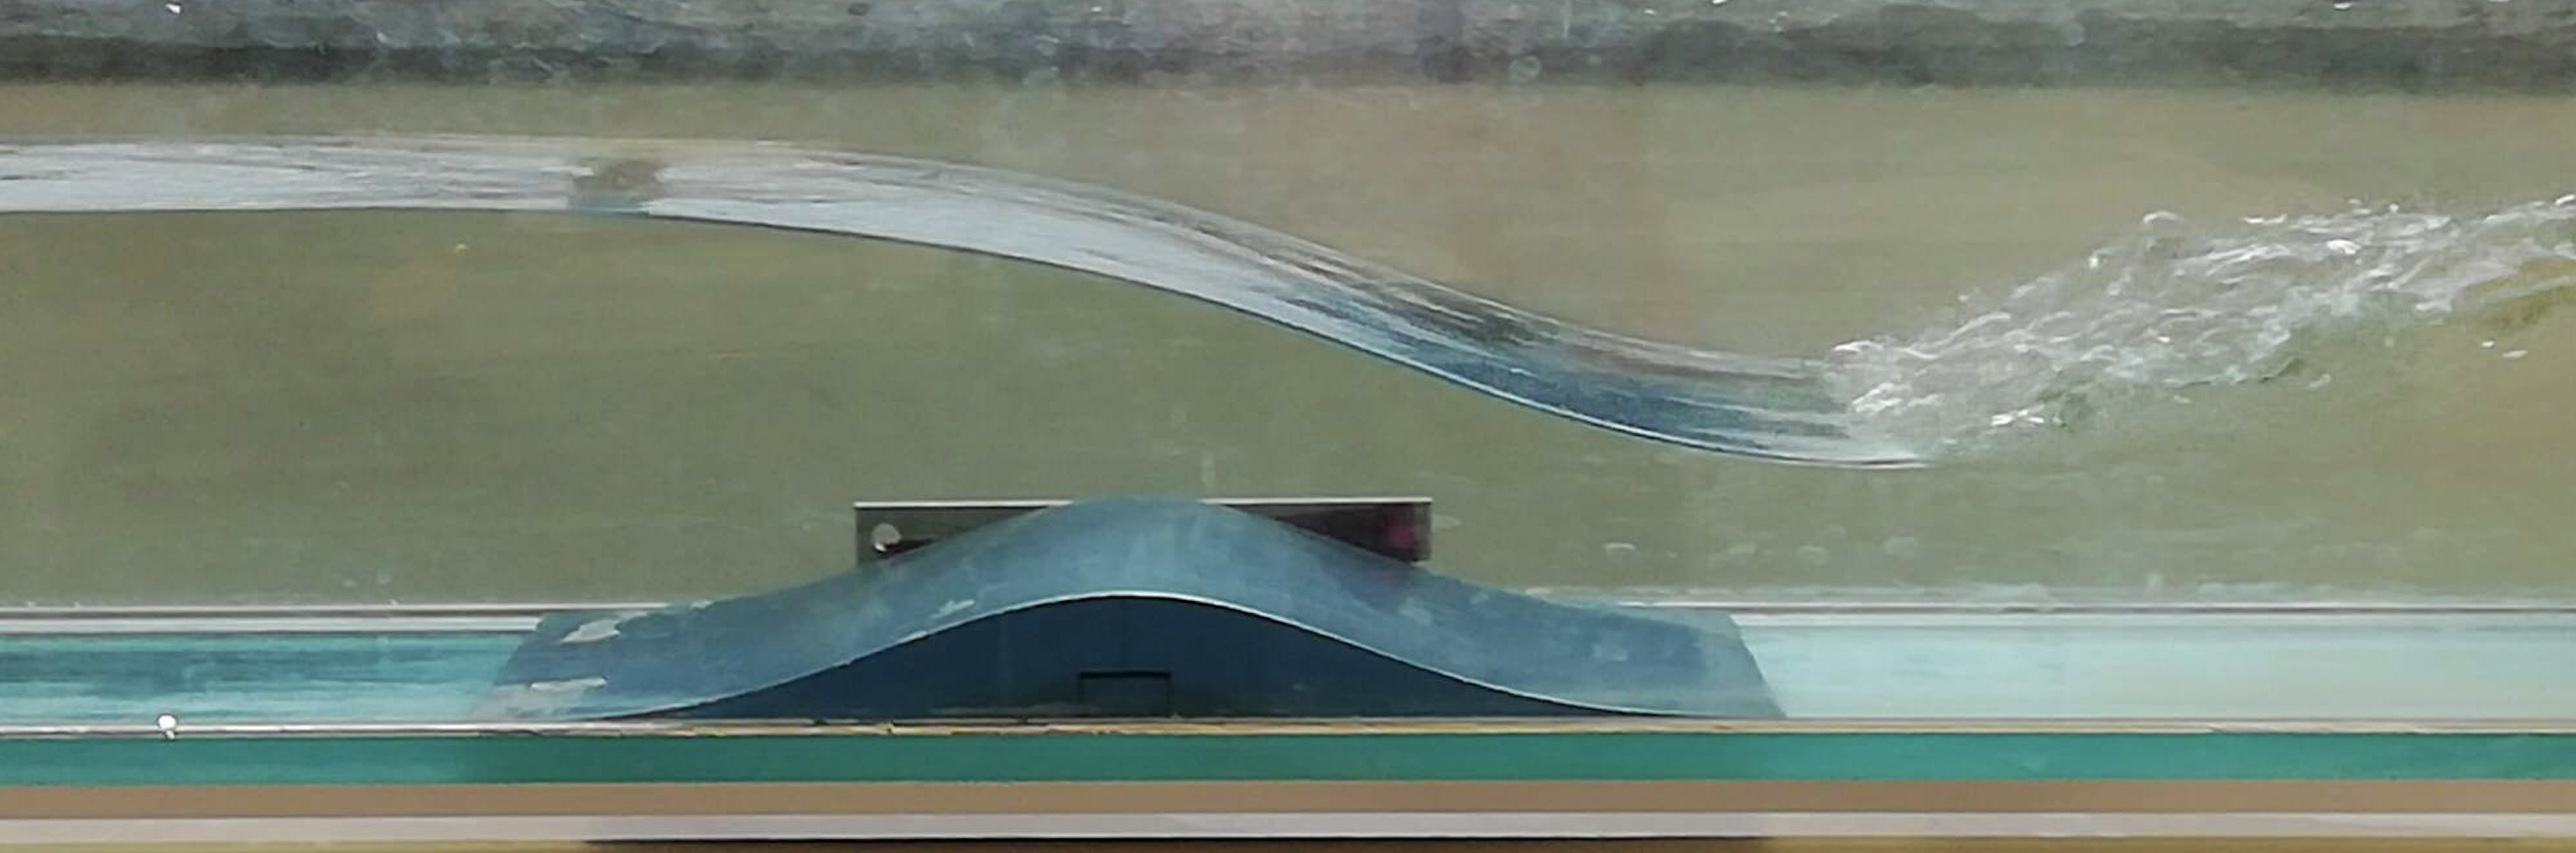

# Question 1

**Question 1.** Exprimez $I(x)$ pour le choix $Z_f(x)$ de l'obstacle gaussien !

**Réponse 1.**

*Rédigez la réponse ici !*

# Paramètres communs aux deux méthodes

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et les sous-programmes !    

*  Colab : ⌘/Ctrl+F9 pour tout exécuter.
*  MyBinder : -> Run -> "Run all cells"

Les paramètres suivants peuvent être changés :

*  `a` : Hauteur de l'obstacle
*  `sig` : Largeur de l'obstacle
*  `hc` : Hauteur critique
*  Sous-programme `Zf` : Fonction $Z_f(x)$ pour la forme de l'obstacle
*  Sous-programme `I` : Fonction pente $I(x) = -Z_f'(x)$

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sp

# Parameters to change
a=3; # Height of the obstacle
sig=20; # Width of the obstacle
hc=5; # Critical height

# Derived parameters
g=9.81; q=(g*hc**3)**.5;
la1=1/(2*sig**2); la2=2*a*la1

      
def Zf(x):
    # Gaussian bathymetry
    global la1, a
    return a*np.exp(-la1*x**2)

def I(x):
    # Slope of the Gaussian bathymetry
    global la1, la2
    return la2*x*np.exp(-la1*x**2)     

## Compilation des sous-programmes pour les deux méthodes

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !  

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    plt.grid(b=True, which='major', color='black', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='grey', linestyle='--',linewidth='0.5')

def sysdyn(x0,h0):
    # Dynamical system of the backwater curves equation
    global s
    Xini=[x0,h0]; 
    sol=odeint(Fu,Xini,s)
    return sol    

def Fu(X,s):
    # Vector field of the dynamical systeme
    global la1, la2, la3, hc, xlen
    x=X[0]; h=X[1];
    Ix=I(x);
    Fr2=(hc/h)**3;
    J=la3/h**(10/3);
    Fx=1-Fr2; Fh=Ix-J
    return [Fx,Fh]

def obsta(xmin,xmax,nx):
    # Plotting the bathymetry
    global K
    xtab=np.linspace(xmin,xmax,nx+1)
    plt.plot(xtab,Zf(xtab),color='red',linewidth=3)

## Tracé de la bathymétrie

Exécutez ce programme pour visualiser l'obstacle !

In [ ]:
# Plot obstacle
global xmin, xmax
inifig(ylab='h')
nx=100; xlen=100; xmin=-xlen; xmax=xlen;
obsta(xmin,xmax,nx)
plt.title("Obstacle")
plt.xlim(xmin,xmax)
plt.ylim(0,15)
plt.show()

# Méthode 1 : Conditions initiales en amont et en aval 

On définit les profondeurs $h_{1max}$ et $h_{2min}$ par les relations :

$$ {\cal E}(q,h_{1max}) = {\cal E}(q,h_{2min})= a + {3\over 2} h_c\;,$$
où ${\cal E}(q,h) = h + q^2/(2 g h^2)$ est l'énergie spécifique.

En choisissant $x_{min}$ et $x_{max}$ suffisamment loin de l'obstacle en amont ou en aval de l'obstacle, on intègre alors le système dynamique avec les conditions initiales $[x(0), h(0)]$ suivantes : 
* $x(0)\in \{x_{min}, x_{max}\}$ avec $h(0)< h_{1max}$ : lignes d'eau torrentielles
* $x(0)\in \{x_{min}, x_{max}\}$ avec $h(0) > h_{2min}$ : lignes d'eau fluviales
* $x(0)\in \{x_{min}, x_{max}\}$ avec $h(0) \in] h_{1max}, h_{2min}[$ : trajectoires du système dynamique ne franchissant pas l'obstacle

Les courbes transcritiques reliant $h_{1max}$ et $h_{2min}$ de part est d'autre de l'obstacle peuvent être approchées par les courbes précédentes. 




# Question 2

**Question 2.** Justifiez la définition des profondeurs $h_{1max}$ et $h_{2min}$ !

**Réponse 2.**

*Rédigez la réponse ici !*

# Sous-programmes pour la méthode 1

Exécutez tout cette partie du programme pour mettre en place  sous-programme de la méthode 1 !

In [ ]:
###### Subroutines of Method ! 
# The backwater curves from left and right 

def Espe(h,hc):
    # Specific function
    E=h+.5*hc**3/h**2
    return E

def H1max(hc,a):
    # Maximum for the torrential curves
    def resi(h,hc,a):return Espe(h,hc)-a-1.5*hc
    h1max=sp.optimize.fsolve(resi,.1*hc,(hc,a))
    return h1max

def H2min(hc,a):
    # Minimum for the fluvial curves
    def resi(h,hc,a):return Espe(h,hc)-a-1.5*hc
    h2min=sp.optimize.fsolve(resi,2*hc,(hc,a))
    return h2min

def remous(K,e1,e2,smaxi):
    # Computing the backwater curves from left and right
    global la1, la2, la3
    global a, hc, xmin, xmax
    global s
    la3=(q/K)**2
    # h1min
    htmax=15; ht=np.linspace(.2,htmax,101)
    h1max=H1max(hc,a)[0]    
    h2min=H2min(hc,a)[0]
    
    # Plot of h1max and h2max having the same specific energy
    if T:
        inifig(xlab='$h$',ylab='$\cal E$')
        plt.ylim(0,12)
        plt.plot(ht,Espe(ht,hc),color='k',linewidth=2)
        plt.scatter(h1max,Espe(h1max,hc),marker='o',color='green',s=50)
        plt.scatter(h2min,Espe(h2min,hc),marker='o',color='green',s=50)
        plt.show(); plt.close()
       
    # Loops for the plot of the backwater curves
    print("Loops in remous")
    inifig(xlab='$x$',ylab='$Z$')   
    plt.title("Backwater curves for $K$ = "+str(K))
    plt.xlim(xmin,xmax)
    plt.ylim(0,15)
    obsta(xmin,xmax,nx)
    # Loop 1 torrential curves
    for h0 in np.linspace(.1,h1max-e1,5):
        Fr20=1-(hc/h0)**3;
        x0=xmin;
        smax=-3*smaxi/(1-Fr20); ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color='g',linestyle='-',linewidth=1)
    
    # Loop 2 fluvial curves
    for h0 in np.linspace(h2min+e2,14,5):
        x0=xmin
        smax=smaxi; ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color='b',linestyle='-',linewidth=1)
            
    # Loop 3 between from right
    for h0 in np.linspace(h1max+e1,h2min-e2,7):
        x0=xmax
        smax=-smaxi; ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color='r',linestyle=':',linewidth=1)
            
    # Loop between from left
    for h0 in np.linspace(h1max+e1,h2min-e2,7):
        x0=xmin
        smax=1000; ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color='r',linestyle=':',linewidth=1)        

    plt.savefig('remous'+str(K)+'.pdf')
    plt.show(); plt.close()

# Question 3

**Question 3.**  Lancez le programme ci-dessous sans changer les paramètres puis diminuez progressivement le nombre de Stricker, en ajustant les valeurs de $e_1$ et $e_2$ pour obtenir les courbes transcritiques. À partir de quelle valeur le programme n'arrive-t-il plus à calcuer les courbes de remous. On pourra diminuer `smax` pour éviter les divergences du code. Insérez la figure obtenue avec cette valeur et commenter les résultats !

**Réponse 3.**

*Rédigez votre réponse ici et insérez la figure ci-dessous !*

## Figure réponse à la question 3 : $K=$ 

*Insérez la figure de la question 3 ici !*

# Programme pour la méthode 1

Paramètre principal à modifier : 

*   `K`: nombre de Strickler
*   `e1`: condition initiale $h_0=h_{1max}-e_1$
*   `e2`: condition initiale $h_0=h_{2min}+e_2$
*   `smaxi`: valeur absolue maximale du paramètre $s$

**Attention** : le programme rencontre des singularités lors de l'intégration du système dynamique, en particulier pour les faibles nombres de Strickler. Pour limiter ces problème, il convient de diminuer la valeur de `smaxi`.

In [ ]:
# Main program of Method1 : Backwater curves from xmin and xmax
T=True; F=False
global K
# For Ks very large, i.e. without friction
K=100000; e1=0; e2=0; smaxi=1000
if T: remous(K,e1,e2,smaxi)
# Pour Ks=100
K=100; e1=.15; e2=.015; smaxi=1000
if F: remous(K,e1,e2,smaxi)
# Pour Ks=
K=60; e1=.3; e2=.1; smaxi=1000
if F: remous(K,e1,e2,smaxi)

# Méthode 2 : Conditions initiales autour du point critique

On définit le point critique $(x_c, h_c)$ comme étant le point stationnaire du système dynamique, qui vérifie donc le sytème:
$$
\left\{\begin{matrix}
 F_x(x,h) &=& 1- Fr^2(h_c) &=& 0 \,,\cr
  F_h(x,h) &=& I(x_c)- J(h_c) &=& 0 \,.\cr
 \end{matrix}
 \right.
 $$
 La Jacobienne du champ de vecteur au point critique est la matrice
 $$
 \underline{\underline A} (x_c,h_c)= \left( \begin{matrix} 
   {\partial F_x \over \partial x}& {\partial F_x \over \partial h}
   \cr
 {\partial F_h \over \partial x}& {\partial F_h \over \partial h}
 \end{matrix}\right)
 = \left( \begin{matrix} 
 0 & 3 h_c^{-1}
   \cr
  I'(x_c)& {10\over 13}\left({q\over K}\right)^2 h_c^{-13/3}
 \end{matrix}\right)$$
 On calcule alors les vecteurs propres $\underline V_1$ et $\underline V_2$ de cette matrices et l'on choisi les conditions initiales suivantes:
* $[x(0),h(0)]=(x_c,h_c) \pm \epsilon \underline V_1$ avec $\epsilon$ petit
* $[x(0),h(0)]=(x_c,h_c) \pm \epsilon \underline V_2$ avec $\epsilon$ petit

Les trajectoires issues de ces conditions initiales décrivent les lignes d'eau transcritiques.



# Question 4
**Question 4.** Vérifiez que la notation $h_c$ désigne à la fois la hauteur critique de l'écoulement et la hauteur du point critique du système dynamique ! Montrez que $x_c$ est la solution d'une équation implicite que vous expliciterez dans le cas d'un obstacle gaussien.

**Réponse 4.**

*Rédigez la réponse ici !*

# Question 5

**Question 5.** Exprimer les composantes de la matrice $\underline{\underline A} (x_c,h_c)$. Calculer ses valeurs et vecteurs propres dans la limite $K\to \infty$ (en l'absence de frottement).

**Réponse 5.**

*Rédigez la réponse ici !*

## Sous-programmes pour la méthode 2

Exécutez tout cette partie du programme pour mettre en place  sous-programme de la méthode 2 !    



In [ ]:
###### Subroutines of Method 2 
## Backwater curves from the critical point 
       
def linep(xc,hc,Zfc,eps,sma,vect):
    # Lines in the direction of the eigenvectors
    global s
    x0,h0=[xc,hc]+eps*vect
    plt.scatter(x0,Zfc+h0,marker='d',color='m',s=30)
    smax=-sma; ns=500; s=np.linspace(0,smax,ns+1)
    sol=sysdyn(x0,h0)
    x=sol[:,0]; h=sol[:,1];
    plt.plot(x,Zf(x)+h,color='c',linestyle='-',linewidth=2)   
    
def lineh(xc,hc,rh,Zfc,sma,col):
    # Lines from points in the vertical direction 
    global s
    for dhn in rh:
        x0=xc; h0=hc+dhn
        plt.scatter(x0,Zf(x0)+h0,marker='s',color='k',s=30)
        Fr20=1-(hc/h0)**3;
        smax=sma/(1-Fr20); ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color=col,linestyle='-',linewidth=1)
        smax=-sma/(1-Fr20); ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color=col,linestyle='-',linewidth=1)    

def linex(xc,hc,rx,Zfc,sma,col):
    # Lines from points in the horizontal direction 
    global s
    for dxn in rx:
        x0=xc+dxn; h0=hc
        plt.scatter(x0,Zf(x0)+h0,marker='s',color='k',s=30)
        Fr20=1-(hc/h0)**3;
        smax=sma/(1-Fr20); ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color=col,linestyle=':',linewidth=1)
        smax=-sma/(1-Fr20); ns=500; s=np.linspace(0,smax,ns+1)
        sol=sysdyn(x0,h0)
        x=sol[:,0]; h=sol[:,1];
        plt.plot(x,Zf(x)+h,color=col,linestyle=':',linewidth=1)    


def critic(K,Zoom,sma):
    # Backwater curves from the vicinity of the critical point
    print("K=",K)
    global la1, la2, la3, xlen
    global a, hc
    global s
    q=(g*hc**3)**.5; la3=(q/K)**2
    epsa=3; 
    
    # Initialize figure
    inifig(ylab='h')
    plt.title("Backwater curves for $K$ = "+str(K))
    
    # Plot obstacle
    nx=100; xlen=100; xmin=-xlen; xmax=xlen;
    obsta(xmin,xmax,nx)
    plt.xlim(xmin,xmax); plt.ylim(0,15) 
    
    # Compute the critical point (xc,hc)
    def resi(x,hc,la2,la3):
        return hc**(-10/3)*la3/la2-x*np.exp(-la1*x**2)
    xc=sp.optimize.fsolve(resi,0,(hc,la2,la3))[0]
    Zfc=Zf(xc); Zc=Zfc+hc
    print("xc=",xc,"hc=",hc)
    plt.scatter(xc,Zc,marker='o',color='k',s=10)
     
    # Plotting with Zoom around the critical point
    if Zoom:
        dxv=20; xvmin=xc-dxv; xvmax=xc+dxv
        dhv=2; Zvmin=Zc-dhv; Zvmax=Zc+dhv
        plt.xlim(xvmin,xvmax); plt.ylim(Zvmin,Zvmax)
    
    # Differential matrix
    A11=0; A12=3/hc
    A21=la2*(1-2*la1*xc**2)*np.exp(-la1*xc**2); 
    A22=(10/3)*la3*hc**(-13/3)
    A=np.array([[A11,A12],[A21,A22]])
    print("A=",A)
    val, vect = np.linalg.eig(A)
    vect1=vect[:,0]; vect2=vect[:,1];
    val1=val[0];vect1=vect1/np.linalg.norm(vect1); 
    print("dir 1 : eigenvalue =",val1,"eigenvector=",vect1)
    val2=val[1];vect2=vect2/np.linalg.norm(vect2); 
    print("dir 2 : eigenvalue =",val2,"eigenvector=",vect2)
    
    # Ploting egeinvectors
    sca=5
    plt.quiver(xc,Zc,vect1[0],vect1[1],angles='xy',color='k',scale=sca)
    plt.quiver(xc,Zc,-vect1[0],-vect1[1],angles='xy',color='k',scale=sca)
    plt.quiver(xc,Zc,vect2[0],vect2[1],angles='xy',color='k',scale=sca)
    plt.quiver(xc,Zc,-vect2[0],-vect2[1],angles='xy',color='k',scale=sca)
    
    # Line 1+ et 1-
    linep(xc,hc,Zfc,epsa,sma,vect1)
    linep(xc,hc,Zfc,-epsa,sma,vect1)
    
    # Line 2+ et 2-
    linep(xc,hc,Zfc,epsa,-sma,vect2)
    linep(xc,hc,Zfc,-epsa,-sma,vect2)
    
    # Line Up and Down
    nh=5; dh=hc/nh; 
    rh=np.linspace(dh,hc-dh,nh); lineh(xc,hc,rh,Zfc,sma,'b')
    rh=np.linspace(-dh,-hc+dh,nh) ;lineh(xc,hc,rh,Zfc,sma,"green") 
        
    # Line Left and Right
    nx=5; msig=3*sig; dx=msig/nx; 
    rx=np.linspace(dx,msig,nx); linex(xc,hc,rx,Zfc,sma,'r')
    rx=np.linspace(-dx,-msig,nx); linex(xc,hc,rx,Zfc,sma,'r')
        
    plt.savefig('critic'+str(K)+'.pdf')
    plt.show(); plt.close()

# Question 6

**Question 6.**  Lancez le programme ci-dessous sans changer les paramètres puis diminuez progressivement le nombre de Stricker. On pourra diminuer `sma` pour éviter les divergences du code. Insérez la figure obtenue avec cette valeur et commenter les résultats ! Commentez les courbes obtenues.

**Réponse 6.**

*Rédigez votre réponse ici et insérez la figure ci-dessous !*

## Figure réponse à la question 6 : $K=$ 

*Insérez la figure de la question 6 ici !*

# Programme pour la méthode 2

Paramètre principal à modifier : 

*   `K`: nombre de Strickler
*   `smax`: valeur absolue maximale du paramètre $s$
* `Zoom` : True ou False pour un zoom sur $(x_c,h_c)$

**Attention** : le programme rencontre des singularités lors de l'intégration du système dynamique, en particulier pour les faibles nombres de Strickler. Pour limiter ces problème, il convient de diminuer la valeur de `smaxi`.

In [ ]:
# Main program of Method 2: Backwater curves from the critical point
T=True # with zoom
F=False # without zoom
global K
K=10000;sma=1000; critic(K,F,sma); critic(K,T,sma);
K=100; sma=100; critic(K,F,sma); critic(K,T,sma);

# Question 7

**Question 7.**  Construire un programme ci-dessous pour reproduire tout ou partie des résultats ci-dessus en choisissant une obstacle décrit par le profil suivant:
$$
Z_f(x)= {a \over 1 + \lambda_1 x^2}\;.
$$
On rappelle que  $\lambda_1 = 1/( 2\sigma^2)$ et $\lambda_2=2a\lambda_1$.

**Réponse 7.**

*Rédigez votre réponse ici et insérez des lignes de codes et des explications ci-dessous !*